### **1. Mô tả bộ dataset**
Dataset từ Kaggle cung cấp dữ liệu gồm các bài báo với tiêu đề, nội dung, và nhãn.  
- **Cột dữ liệu chính**:
  - `title`: Tiêu đề bài báo.
  - `text`: Nội dung bài báo.
  - `label`: Nhãn, với:
    - 0: Tin giả.
    - 1: Tin thật.  
- **Đặc điểm**:
  - Bộ dữ liệu có số lượng lớn các bản ghi, giúp đào tạo và kiểm tra các mô hình học máy.

---

### **2. Mô tả bài toán**
**Bài toán**: Phân loại một bài báo là thật hay giả dựa trên tiêu đề và nội dung.  
- **Loại bài toán**: Classification (Supervised Learning).  
- **Mục tiêu**:  
  - Xây dựng mô hình dự đoán chính xác nhãn (`label`) của bài báo dựa trên tiêu đề và nội dung.
  - Đo lường hiệu suất mô hình qua độ chính xác, ma trận nhầm lẫn, và báo cáo phân loại.

---

### **3. Phương pháp thực hiện**
  - Sử dụng Random Forest.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/LR/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/LR/data/evaluation.csv
/content/gdrive/MyDrive/LR/data/train.csv
/content/gdrive/MyDrive/LR/data/test.csv


 Tải 3 tệp dữ liệu: train.csv, test.csv, và evaluation.csv. Các tệp này chứa dữ liệu văn bản và nhãn phân loại (True hoặc Fake).

In [ ]:
import pandas as pd

# Tải dữ liệu từ các tệp CSV
train = pd.read_csv("/content/gdrive/MyDrive/LR/data/train.csv", delimiter=';')
test = pd.read_csv("/content/gdrive/MyDrive/LR/data/test.csv", delimiter=';')
eval = pd.read_csv("/content/gdrive/MyDrive/LR/data/evaluation.csv", delimiter=';')

# Kiểm tra thông tin dữ liệu
print(train.head())
print(test.head())
print(eval.head())


   Unnamed: 0                                              title  \
0           0  Palestinians switch off Christmas lights in Be...   
1           1  China says Trump call with Taiwan president wo...   
2           2   FAIL! The Trump Organization’s Credit Score W...   
3           3  Zimbabwe military chief's China trip was norma...   
4           4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   

                                                text  label  
0  RAMALLAH, West Bank (Reuters) - Palestinians s...      1  
1  BEIJING (Reuters) - U.S. President-elect Donal...      1  
2  While the controversy over Trump s personal ta...      0  
3  BEIJING (Reuters) - A trip to Beijing last wee...      1  
4  There has never been a more UNCOURAGEOUS perso...      0  
   Unnamed: 0                                              title  \
0           0  Live from New York, it's a Trump-Clinton remat...   
1           1  Catalan separatists to lose majority in tight ...   
2           2  

Kết hợp các cột title và text, loại bỏ stopwords và thực hiện stemming.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Tải stopwords nếu chưa tải
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Hàm tiền xử lý văn bản
def preprocess(text):
    text = text.lower()  # Chuyển thành chữ thường
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Loại bỏ ký tự không phải chữ
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]  # Stemming
    return ' '.join(words)

# Áp dụng tiền xử lý cho cả title và text trong train, test và eval
train['processed'] = train['title'] + ' ' + train['text']
test['processed'] = test['title'] + ' ' + test['text']
eval['processed'] = eval['title'] + ' ' + eval['text']

train['processed'] = train['processed'].apply(preprocess)
test['processed'] = test['processed'].apply(preprocess)
eval['processed'] = eval['processed'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Chia dữ liệu thành các tập huấn luyện, kiểm tra và đánh giá:

In [ ]:
X_train = train['processed']
y_train = train['label']

X_test = test['processed']
y_test = test['label']

X_eval = eval['processed']
y_eval = eval['label']


Vector Hóa Văn Bản
* Sử dụng TF-IDF Vectorizer để chuyển đổi văn bản thành các đặc trưng số.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vector hóa văn bản với TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_eval_tfidf = vectorizer.transform(X_eval)


Khởi tạo và huấn luyện mô hình Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình với dữ liệu huấn luyện
rf_model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test_tfidf)

# Đánh giá mô hình
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {rf_accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred_rf))


Accuracy: 98.35%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3753
           1       0.99      0.98      0.98      4364

    accuracy                           0.98      8117
   macro avg       0.98      0.98      0.98      8117
weighted avg       0.98      0.98      0.98      8117



Kết quả mô hình Random Forest có độ chính xác 98.35%. Các chỉ số:

- **Precision**: 0.97 cho lớp Fake và 0.99 cho lớp True.
- **Recall**: 0.99 cho lớp Fake và 0.98 cho lớp True.
- **F1-Score**: 0.98 cho cả hai lớp, chứng tỏ mô hình đạt sự cân bằng tốt giữa độ chính xác và độ nhạy.
- **Accuracy**: 98.35%, cho thấy mô hình phân loại tin giả và tin thật rất hiệu quả và ổn định.

Mô hình Random Forest đạt hiệu suất cao, với các chỉ số vượt trội trong cả hai lớp.

Đánh giá mô hình sử dụng các chỉ số như accuracy, precision, recall, F1-score, và ma trận nhầm lẫn.

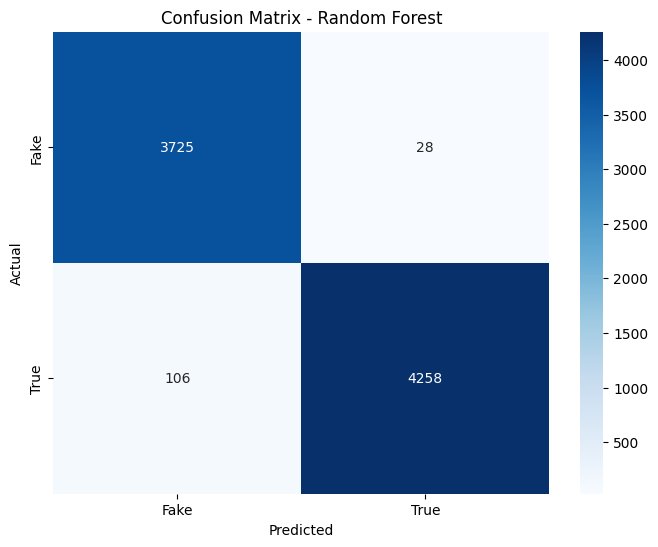

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hiển thị ma trận nhầm lẫn
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Biểu Đồ Đánh Giá Hiệu Suất (Performance Metrics Plot)

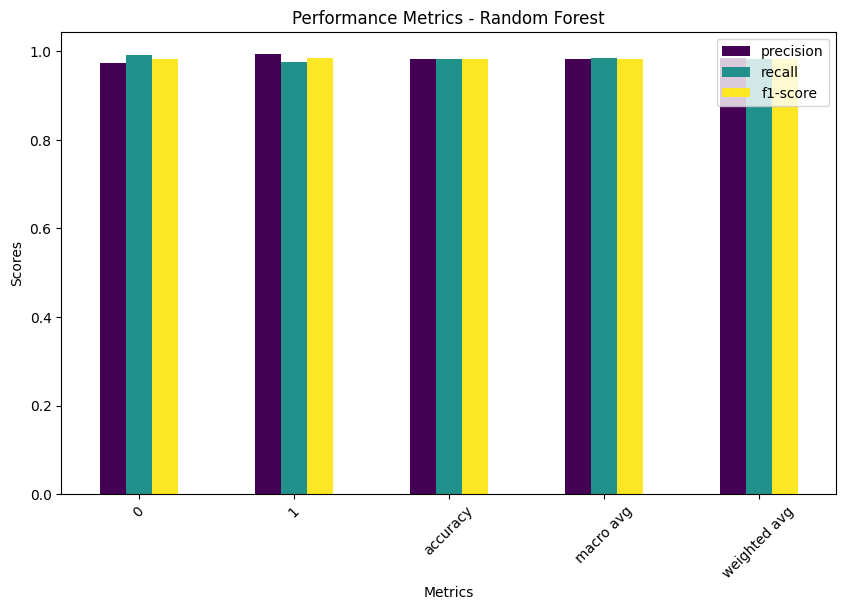

In [ ]:
from sklearn.metrics import classification_report

# Lấy các chỉ số từ classification_report
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Vẽ biểu đồ đánh giá hiệu suất
report_df.drop(columns=['support'], inplace=True)  # Loại bỏ cột 'support' vì không cần thiết
report_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Performance Metrics - Random Forest')
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()


Cuối cùng, đánh giá mô hình trên tập dữ liệu evaluation.csv.

In [ ]:
# Dự đoán trên tập evaluation
y_eval_pred_rf = rf_model.predict(X_eval_tfidf)

# Đánh giá trên tập evaluation
eval_accuracy_rf = accuracy_score(y_eval, y_eval_pred_rf)
print(f'Evaluation Accuracy: {eval_accuracy_rf * 100:.2f}%')
print(classification_report(y_eval, y_eval_pred_rf))


Evaluation Accuracy: 97.91%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3803
           1       0.99      0.97      0.98      4314

    accuracy                           0.98      8117
   macro avg       0.98      0.98      0.98      8117
weighted avg       0.98      0.98      0.98      8117



Kết quả trên cho thấy mô hình đạt độ chính xác cao **97.91%** khi đánh giá trên tập dữ liệu kiểm định (evaluation).

- **Precision (Độ chính xác)**:
  - Lớp 0 đạt 0.97, lớp 1 đạt 0.99 → Hệ thống phân biệt khá tốt giữa tin thật (0) và tin giả (1).
  
- **Recall (Độ nhạy)**:
  - Lớp 0 đạt 0.99, lớp 1 đạt 0.97 → Mô hình xác định đầy đủ các nhãn quan trọng.

- **F1-score (Hiệu suất chung)**:
  - Đều đạt ~0.98, chứng tỏ mô hình duy trì cân bằng giữa precision và recall.
